# Introduction to Exploratory Data Analysis (EDA) + Visualization
Early Data Analysis is used to find hidden patterns in the data. EDA displays and explores meaningful patterns and behaviors in the data. It can also be used for data cleaning to remove abnormalities in the data. EDA assists in decision-making for hypothesis statements and the type of Machine Learning Model to be deployed.
## The importance of EDA
When performed incorrectly, the result can affect the steps used in model building. The data quality can affect the model's efficiency if the data is not explored.

Visualization is a crucial part of data analytics and data science. It is recommended that you follow Edward Tufte's principles of Data Visualization, which was published in 1983 and provides a detailed understanding of the key principles of Visualization.
1. Graphical integrity:  Uses the principles to represent numbers directly proportional to the numerical quantities. This prevents misrepresentation of the data. The size of the bars should define the correct scale of the information. Use clear, detailed, and thorough labeling to defeat graphical distortion and ambiguity. The information assists the viewer in understanding the information. Display the data variation, not the design variation. This refers to choosing the visual appeal over the representation of the actual data. Use deflated standardized units of measurement when displaying time series. The measures of time should be the same. In the case of missing data, it is represented as the time to date for incomplete information. This is important when comparing complete data against current data in a space where the data still needs to be completed. Do not let graphics quote data out of context. To build an accurate summary, the information should be represented accurately. This could affect essential details in using the incorrect graphical display.
2. Data Ink: Show the data above all else for any other chart or dashboard characteristics. An example of this would be grid lines in a graph compared to the trend lines or line chart. Maximize the data-ink ratio; data should be in color to emphasize the data. Remove non-data ink, minimize or remove elements like borders, gridlines, and excessive labels. Remove unnecessary or redundant data when presenting the data to prevent overburdening the viewer. The point is to show the data at a glance. Revise, edit, and review the graph and data to check for accuracy and understandability.
3. Chart junk: Chart junk is the excessive and unnecessary use of graphical effects. Avoid moire vibration, heavy grids, and self-promoting graphs as they showcase design skills rather than data. The moire vibration is a visual distortion that is the mechanical interference of light by the superimposed network of lines. The pattern is created by repetitive structures such as a mesh.  
4. Data Density: Using high-density graphs that can be sized without compromising the information presented.
5. Small multiples: These are multiple small graphs that demonstrate the Visualization of large quantities of data rather than layering all the information in a single location. Using multiple bar charts rather than one single will give more details.

## Visualizing the data using pivot tables
A pivot table is a tabular representation that combines and summarizes the individual elements of a larger dataset into specific categories or groups. In Python, a pivot table can be created using the `pandas.pivot_table()` method.  

## Matplotlib
This is one of the earliest libraries for developing static, interactive, or animated visualizations. The matplotlib library is the underlying module for other libraries like plotly and Seaborn. Matplotlib creates quality plots and graphs, uses third-party packages built on matplotlib, customizes graphic styles and layouts, exports graphs to various file formats, and embeds graphics in JupyterLabs and other GUIs. The library should be imported, and there are several key features.

## Main Graph Types
1. Histogram
2. Pie Chart
3. Sub Plot
4. Treemap
5. Bar Chart

![chartDecisionTree](https://www.analyticsvidhya.com/wp-content/uploads/2015/05/Chart_Selection.jpeg)

## Visualizations: Tables
Tables provide a useful method of referencing information and the connectedness of variables. These are easier to use when the data is of a reasonable size and the view can be constrained to include just the information we need to see. When the tables are too large with all of the data a pivot table can be created. The Pivot Table is an aggregation or grouping of data by characteristics to represent a relationship between the data points. We can use the Python `.groupby()` method to generate a view that groups the data by a specific variable or range of values.

# Working with Visualizations in Seaborn

In [7]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Start by importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Let's make sure pandas returns all the rows for the dataframe
pd.set_option("display.max_rows", None)

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import Visualization Libraries
import seaborn as sns

# Read the data into a dataframe using the first column as an index
path = "/content/drive/MyDrive/Continuing Education/Howard University Applied Data Science/HU Bootcamp 2025/Live Coding/"
housingDF = pd.read_csv(path + "HousePrices.csv", index_col=0)
housingDF.head()

Mounted at /content/drive


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
# Let's check the shape
housingDF.shape

(4600, 17)

In [9]:
# Method 1: Using pandas .groupby()
# City is a categorical column,
# Let's use it to aggregate mean by city name
housingDF.groupby(["city"]).mean(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
city,,,,,,,,,,,,,
Algona,2.072880e+05,3.200000,1.900000,1608.600000,11494.200000,1.400000,0.000000,0.000000,3.200000,1608.600000,0.000000,1983.200000,800.400000
Auburn,2.993404e+05,3.420455,2.092330,2019.579545,24999.221591,1.448864,0.000000,0.125000,3.409091,1862.250000,157.329545,1980.795455,725.761364
Beaux Arts Village,7.450000e+05,3.000000,1.750000,1490.000000,9800.000000,1.000000,0.000000,0.000000,4.000000,1140.000000,350.000000,1947.000000,1988.000000
Bellevue,8.471807e+05,3.804196,2.453671,2694.527972,13741.178322,1.398601,0.006993,0.391608,3.590909,2182.604895,511.923077,1973.814685,823.517483
Black Diamond,3.396056e+05,3.222222,1.750000,1863.333333,25006.666667,1.388889,0.000000,0.000000,3.222222,1807.777778,55.555556,1978.666667,1107.333333
Bothell,4.814419e+05,3.606061,2.431818,2319.393939,9060.181818,1.500000,0.000000,0.000000,3.151515,1957.878788,361.515152,1982.696970,727.151515
Burien,3.489472e+05,3.337838,1.746622,1815.337838,12158.554054,1.209459,0.040541,0.540541,3.554054,1468.445946,346.891892,1957.351351,1183.945946
Carnation,5.087520e+05,3.090909,2.170455,2392.454545,64873.772727,1.522727,0.000000,0.318182,3.090909,2205.181818,187.272727,1982.818182,727.318182
Clyde Hill,1.321945e+06,4.181818,2.613636,3620.909091,19633.909091,1.181818,0.000000,0.818182,3.545455,2522.727273,1098.181818,1964.454545,1092.000000


In [11]:
# Method 2
pd.pivot_table(housingDF[['price', 'bedrooms', 'bathrooms',
                  'sqft_living','sqft_lot','floors',
                  'waterfront', 'view','condition',
                 'sqft_above', 'city', 'yr_built']], index = ['city','yr_built'])

bathrooms  bedrooms  condition    floors  \
city                yr_built                                             
Algona              1956       1.000000  2.000000   3.000000  1.000000   
                    1960       1.000000  3.000000   4.000000  1.000000   
                    1992       2.000000  3.000000   3.000000  1.000000   
                    2002       2.500000  4.000000   3.000000  2.000000   
                    2006       3.000000  4.000000   3.000000  2.000000   
Auburn              1908       1.000000  3.000000   4.000000  1.000000   
                    1910       2.000000  2.500000   4.500000  1.750000   
                    1912       1.500000  3.000000   4.000000  1.250000   
                    1913       2.250000  3.000000   5.000000  1.500000   
                    1927       2.000000  2.000000   5.000000  1.000000   
                    1931       2.500000  4.000000   5.000000  1.000000   
                    1938       1.000000  3.000000   4.000000  1.500000   
                    1942       1.000000  3.000000   4.000000  1.500000   
                    1943       1.000000  2.000000   4.000000  1.000000   
                    1948       1.000000  2.000000   4.000000  1.000000   
                    1952       2.000000  3.000000   4.000000  1.000000   
                    1954       1.000000  2.000000   4.000000  1.000000   
                    1957       1.750000  3.000000   4.000000  1.000000   
                    1958       1.375000  3.000000   5.000000  1.000000   
                    1959       1.875000  4.000000   4.250000  1.000000   
                    1960       1.333333  3.333333   4.000000  1.000000   
                    1961       2.000000  3.500000   3.500000  1.000000   
                    1962       1.350000  2.400000   3.600000  1.000000   
                    1963       1.250000  3.500000   3.000000  1.000000   
                    1964       1.500000  3.000000   4.000000  1.000000   
                    1965       2.166667  4.000000   4.333333  1.000000   
                    1966       1.312500  3.500000   3.500000  1.000000   
                    1967       1.250000  3.250000   3.500000  1.000000   
                    1968       1.750000  3.375000   3.750000  1.000000   
                    1969       1.000000  3.000000   4.000000  1.000000   
                    1972       1.562500  2.750000   3.250000  1.250000   
                    1973       1.875000  3.250000   3.500000  1.000000   
                    1974       1.500000  4.000000   4.000000  1.000000   
                    1975       2.000000  4.000000   4.000000  1.000000   
                    1976       2.000000  3.333333   4.000000  1.666667   
                    1977       1.666667  4.333333   3.666667  1.000000   
                    1978       2.375000  3.833333   3.333333  1.333333   
                    1979       2.250000  3.333333   3.333333  1.166667   
                    1980       1.625000  3.000000   2.500000  1.250000   
                    1981       2.000000  3.500000   3.000000  1.500000   
                    1982       2.250000  4.000000   4.000000  1.000000   
                    1983       1.583333  3.000000   3.333333  1.166667   
                    1984       1.916667  3.333333   3.333333  1.333333   
                    1985       1.750000  3.000000   3.000000  1.000000   
                    1986       2.083333  3.333333   3.333333  1.000000   
                    1987       2.300000  3.200000   3.400000  1.600000   
                    1988       2.500000  3.000000   3.000000  2.000000   
                    1989       2.500000  3.666667   3.000000  1.333333   
                    1990       2.428571  3.285714   3.285714  1.714286   
                    1993       3.000000  4.000000   3.000000  2.000000   
                    1994       2.500000  4.333333   3.000000  2.000000   
                    1995       2.333333  4.000000   3.000000  1.666667   
                    1996       1.6

In [12]:
# Let's see the details of the dataframe
housingDF.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9),

In [13]:
# Let's use the .describe method to see the summary statistics
housingDF.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## Building Groups for Numerical Columns and Categorical Variables

In [14]:
# There are two methods to find the numerical columns
num_feature_cols = list(housingDF._get_numeric_data().columns)
num_feature_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [15]:
# To determine the length of the full list
print("We have", len(num_feature_cols),"numerical columns.")

We have 13 numerical columns.


In [16]:
# To get the categorical variables using the set functions
cat_feature_cols = list(set(housingDF.columns) - set(housingDF._get_numeric_data().columns))
cat_feature_cols

['statezip', 'city', 'street', 'country']

In [17]:
# To determine the length of the full list
print("We have", len(cat_feature_cols),"categorical columns.")

We have 4 categorical columns.


In [18]:
# Here is another method to find the categorical columns
cat_feature_cols2 = housingDF.select_dtypes(exclude=["int","float"]).columns
cat_feature_cols2

Index(['street', 'city', 'statezip', 'country'], dtype='object')

In [19]:
# Here is another method to find the numerical values
num_feature_cols2 = housingDF.select_dtypes(include=["int","float"]).columns
num_feature_cols2

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

# Exploratory Data Analysis (EDA)
## Univariate Analysis
The analysis to gain insight into the distribution of variables and their relative relationships let's start with some Univariate Analysis to determine the causality of those variables on each other and the overall data set. This is the descriptive statistics of the variables and is not used to determine causality or relationships.  This is perform with both **numerical** and **categorical** variables.

### Histograms
* Used to analyze and visualize the distribution of our data.
* The histogram uses the sorted list of data in either ascending or descending sort to build containers or bins for the data to examine the frequency of the values.  



<Axes: >

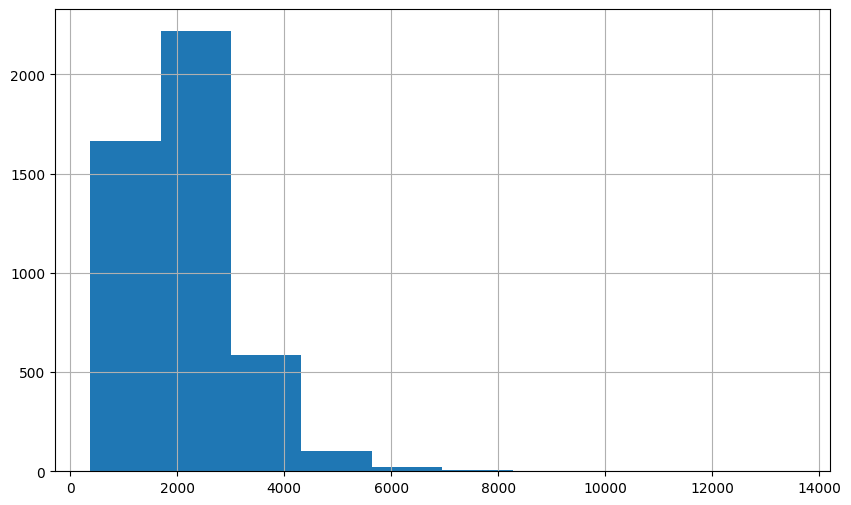

In [21]:
# Using the pandas plotting library to create histogram
# Numerical Variable Example
housingDF['sqft_living'].hist(figsize=(10,6))

<Axes: >

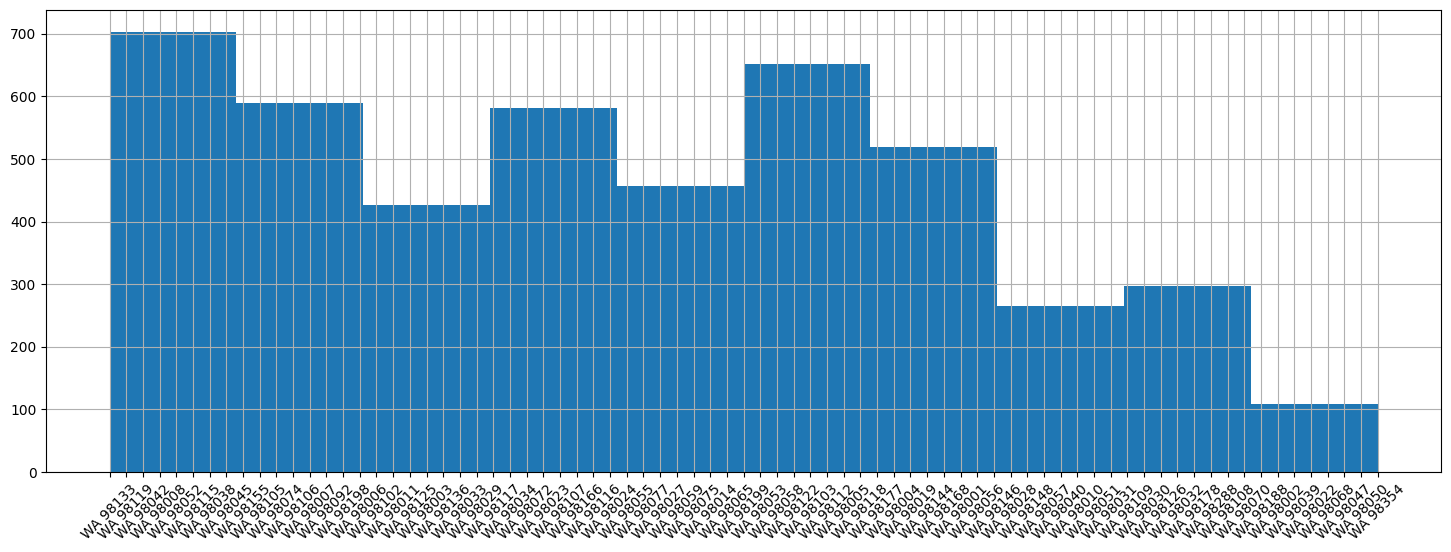

In [24]:
# Using the pandas plotting library to create histogram
# Categorical Variable Example
housingDF['statezip'].hist(figsize=(18,6), xrot=45)

<Axes: xlabel='sqft_living', ylabel='Count'>

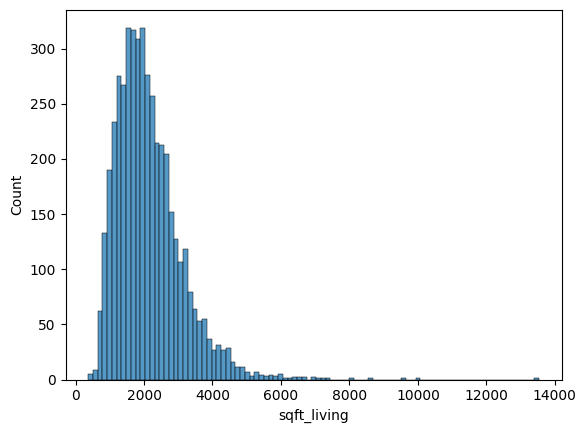

In [25]:
# The same plot using seaborn
sns.histplot(data=housingDF, x='sqft_living')

The plot above have granular bins and the outliers are stretching the x-axis, obscuring the values in the majority of the values.  The axis stretch gives a view of extreme kurtosis so let's adjust the x-axis scale and set the number of bins.

<Axes: xlabel='sqft_living', ylabel='Count'>

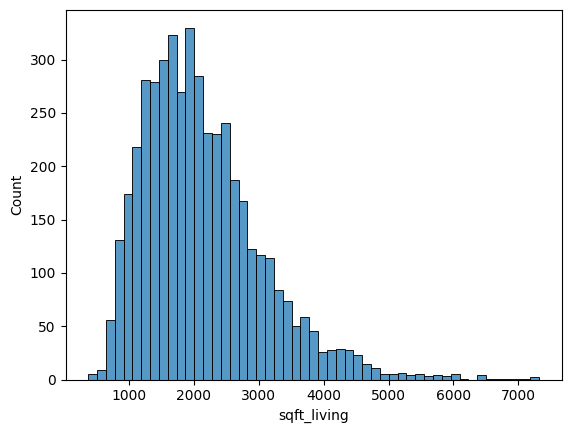

In [28]:
# Let's grab only the values under a lot size of 8,000 and omit outliers
sns.histplot(data=housingDF[housingDF['sqft_living']<=8000], x='sqft_living')

Setting the number of bins appropriately is important.  The figure below shows the effect of the same graph with differing bin size.  There is not correct answer for the number of bins to use. The key is to set the bins in a balanced size.
![bins comp](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histograms-showing-different-bin-sizes.png)

![good hist](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histogram-frequencies-for-age.png)

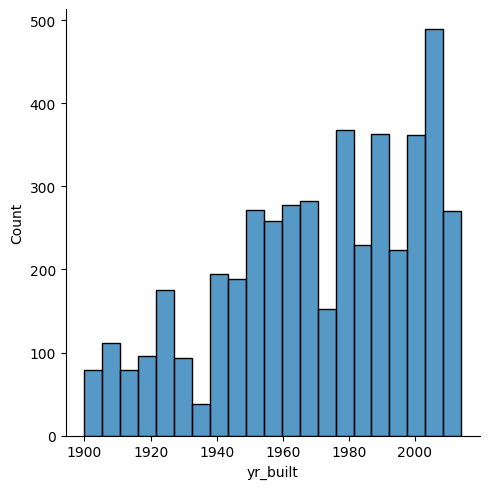

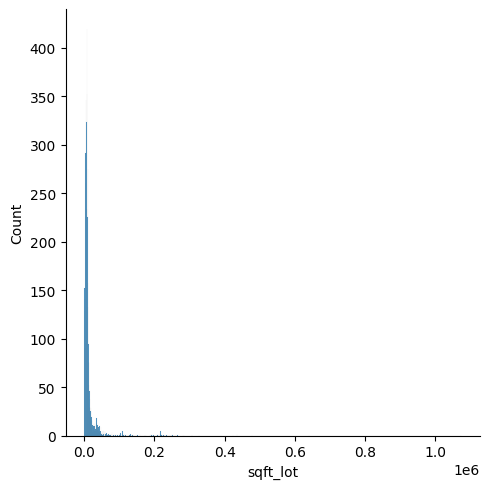

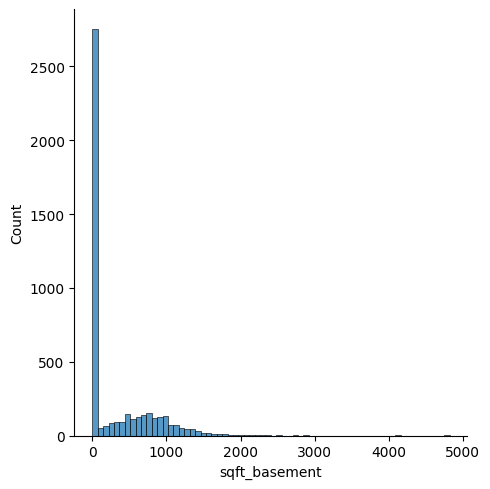

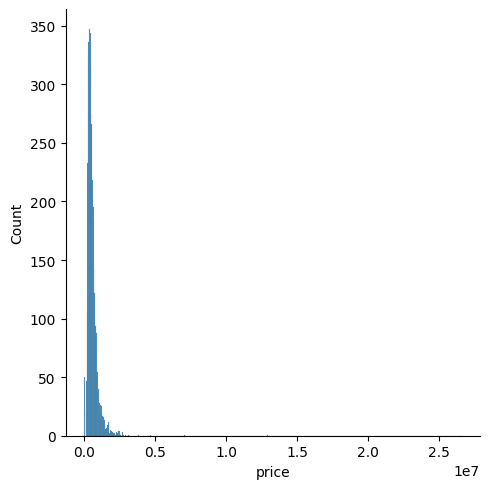

In [29]:
# Let’s create a sample of the data to create more than one plot at once
housingDF_sample = housingDF[["yr_built","sqft_lot","sqft_basement","price"]]

# Now let's use a loop to iterate through and create each plot
for col in housingDF_sample.columns:
    sns.displot(housingDF_sample[col])

# distplot is a deprecated function, use displot to create the plots

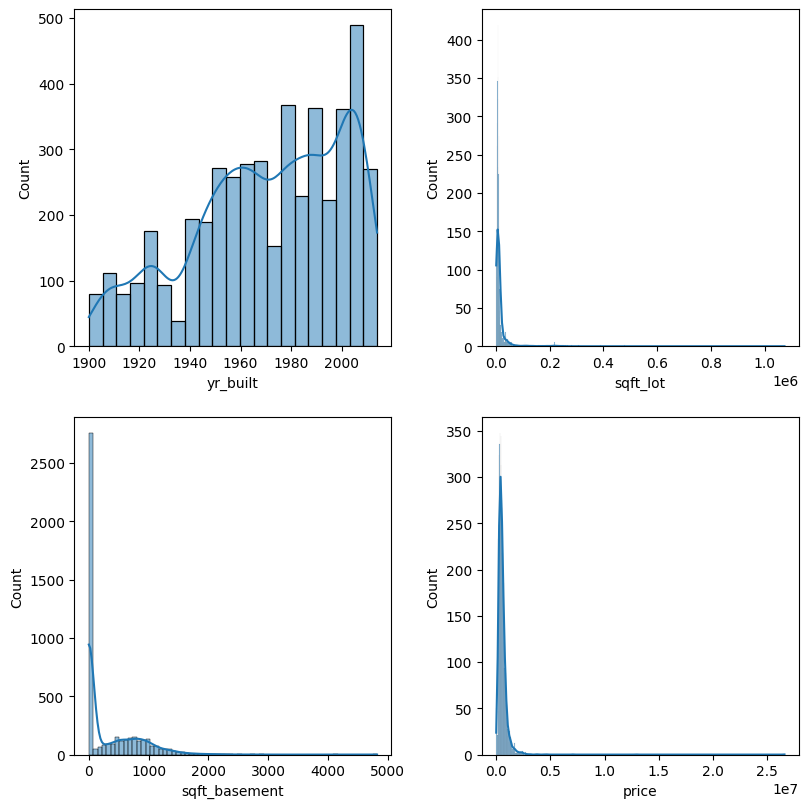

In [30]:
# Let's use the subplots to place them side by side.

# Start by defining the figure and axis
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))

# Now we need to set a plot in each setting the index for each plot.
# Then the plots can start from the first frame
index=0

#Flatten the axis matrix into one dimension
axs = axs.flatten()

# Let's create a data dictionary to iterate through the key:value of each column
for k,v in housingDF_sample.items():
    # Build the histogram for the designated column (key)
    sns.histplot(x=k, data=housingDF_sample,
        ax=axs[index], kde=True)
    # We need to iterate through the index and move to the next cell
    index +=1
    # We can adjust the distance between the plots, adding padding
    plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2)

array([[<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

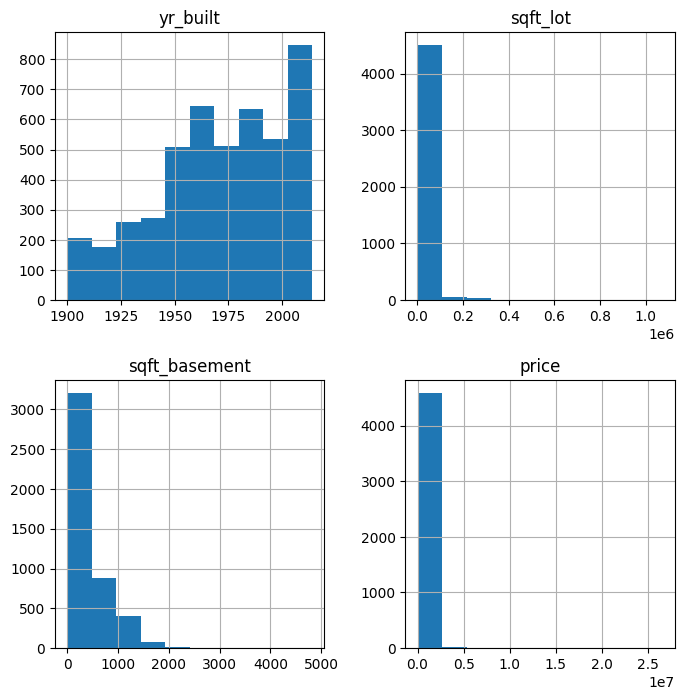

In [31]:
# This can also be performed with pandas
housingDF_sample.hist(figsize=(8,8))

### Box Plots
These are the box and whisker plots and display the interquartile range of the data.  The box is constructed with the first quartile as the base of the plot or the left side when elongated across the x-axis, the top or right of the box is the third quartile.  The line in the middle is the median or third quartile.  The whiskers are lines that display the arbitrary minimum and maximum values.  Values that lie outside the whiskers represent the outliers in the data.

**Anatomy of a Box Plot**
</br>
![boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

<Axes: ylabel='price'>

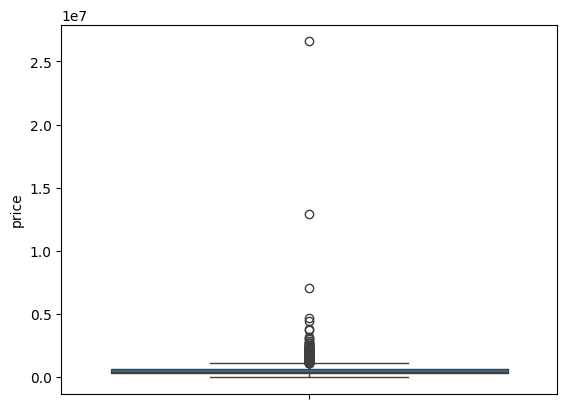

In [32]:
# Creating a single box plot
sns.boxplot(y=housingDF_sample["price"], data=housingDF_sample)

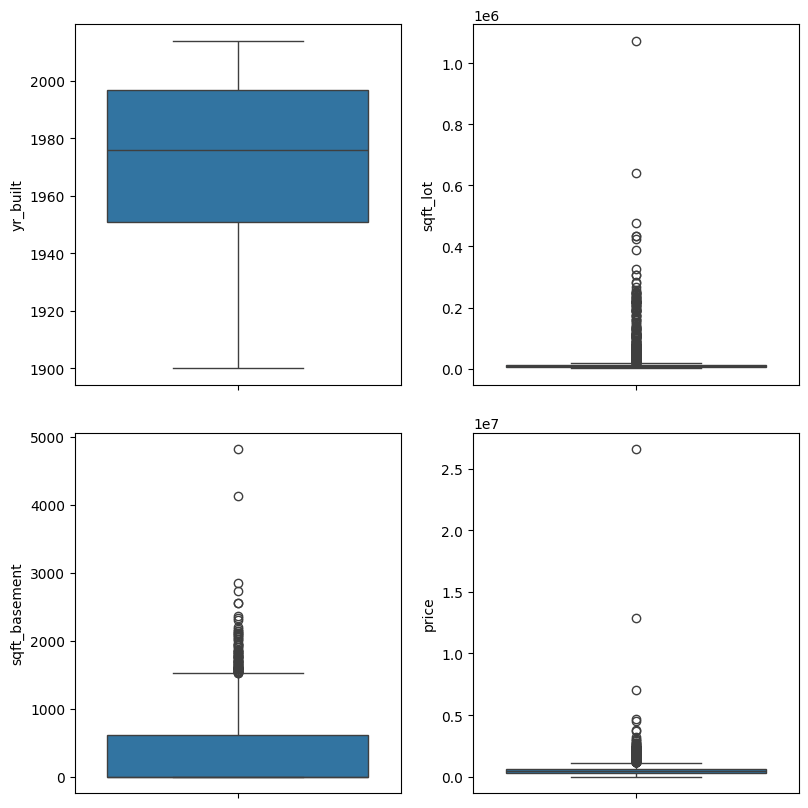

In [33]:
# Let's use the subplots to place them side by side.

# Start by defining the figure and axis
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))

# Now we need to set a plot in each setting the index for each plot.
# Then the plots can start from the first frame
index=0

#Flatten the axis matrix into one dimension
axs = axs.flatten()

# Let's create a data dictionary to iterate through the key:value of each column
for k,v in housingDF_sample.items():
    # Build the histogram for the designated column (key)
    sns.boxplot(y=k, data=housingDF_sample,
        ax=axs[index])
    # We need to iterate through the index and move to the next cell
    index +=1
    # We can adjust the distance between the plots, adding padding
    plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=2)

<Axes: xlabel='price', ylabel='city'>

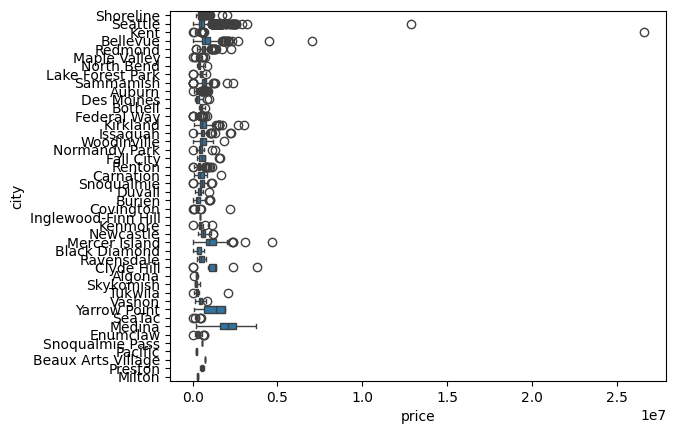

In [34]:
# The box plots can be tiled into one displayed graph
sns.boxplot(x=housingDF["price"], y=housingDF["city"])


## Countplot

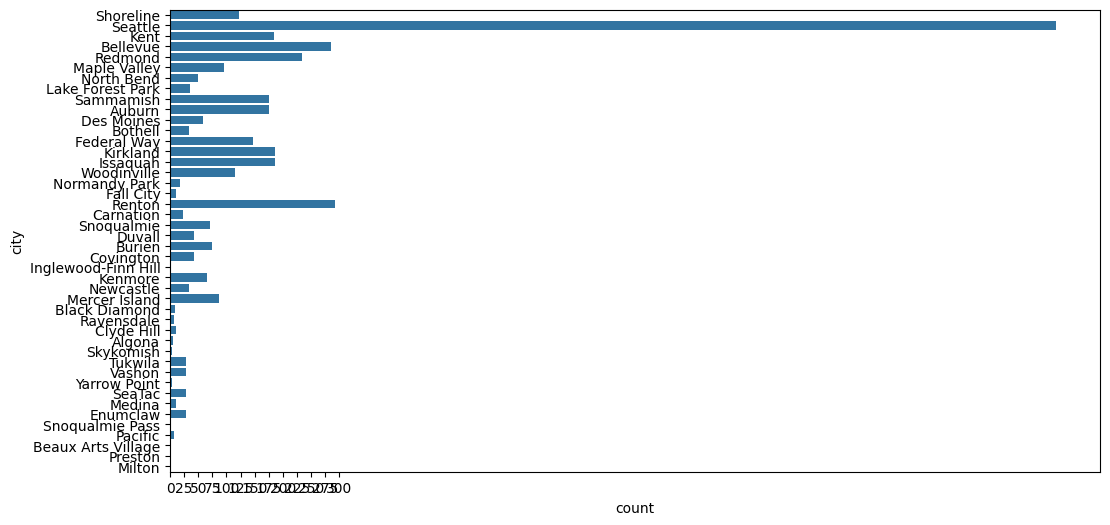

In [35]:
# Set the figure size and axis
fig = plt.figure(figsize=(12,6))
ax=fig.add_subplot()

# Create the plot
sns.countplot(y=housingDF['city'])

# Add more tick marks to make visualization estimations easier
ax.set_xticks(list(range(0,325,25)))

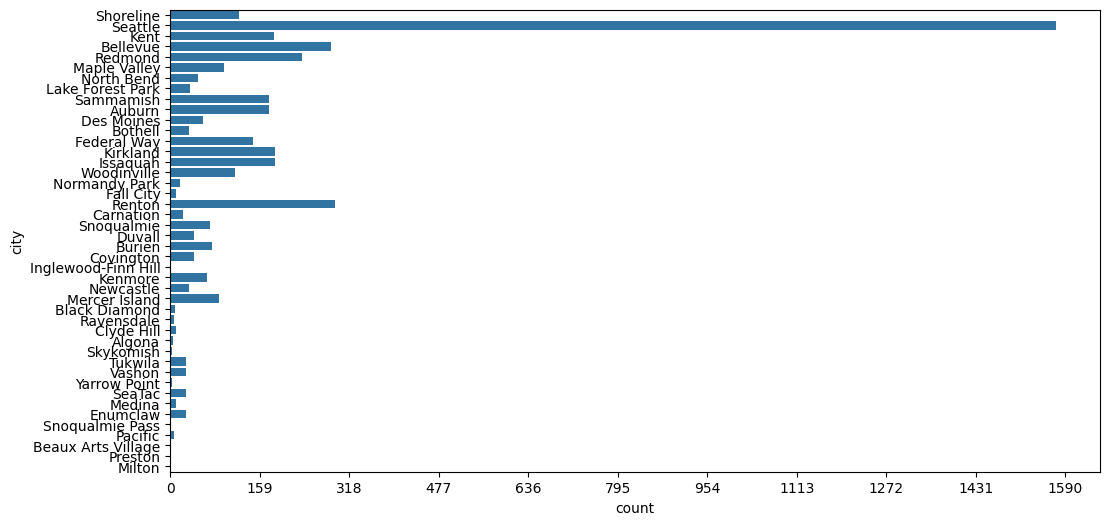

In [36]:
# Let's try it with the maximum value desginating the max scale.
# Set the figure size and axis
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot() #define axis so we can change configs

# Create the plot
sns.countplot(y=housingDF['city'])
endpoint = housingDF['city'].value_counts().max() + 25
steps = int(endpoint/10)

# Add more tick marks to make visualization estimations easier
ax.set_xticks(list(range(0,endpoint,steps)))

## Multivariate analysis
Multivariate analysis follows the univariate analysis and is used to examine the relationships between variables and discern patterns in the relationships.  There are different combinations.
1. categorical vs. numerical
2. numerical vs. numerical
3. categorical vs. categorical

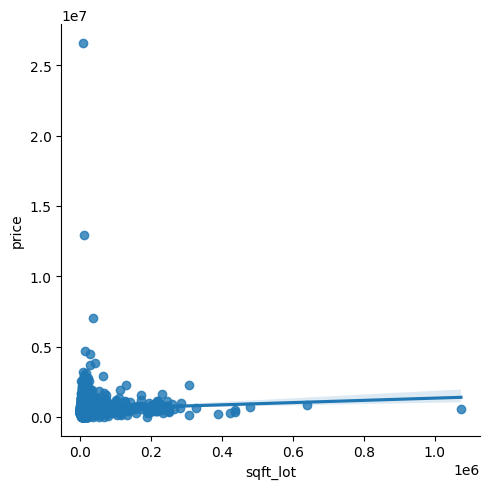

In [37]:
# Linear Model Plot
sns.lmplot(housingDF, y="price", x="sqft_lot")

### Join Plot
This plot style combines several types of plots into a single view and is useful for giving multiple insights in one view: <br>
This plot features:
* Scatterplot
* Linear Regression Line Fit
* Histogram

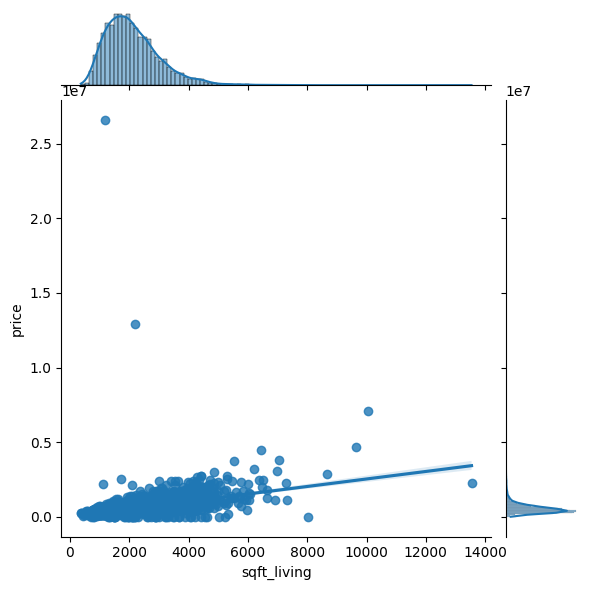

In [38]:
sns.jointplot(housingDF, y="price", x="sqft_living", kind="reg")

The axes can be designated manually as previously described. The best practice is to eliminate the outliers to yield a scale that allows dispersion of the data points.

## Pairplot
The pair plot allows you to see the results of many plots at once, stratifying variables against each other to see the relatedness visually. There is a diagonal down the middle where the values are stratified against itself and results in a correlation of exactly one, the top half of the pair plot is a reflection of the bottom half. The pair plot can show the kernel density function or kdf which is the distribution of data similar to the normal distribution. In the pair plots you can see linear, polynomial, and other mathematical relationships that tell you about the relatedness of the data.

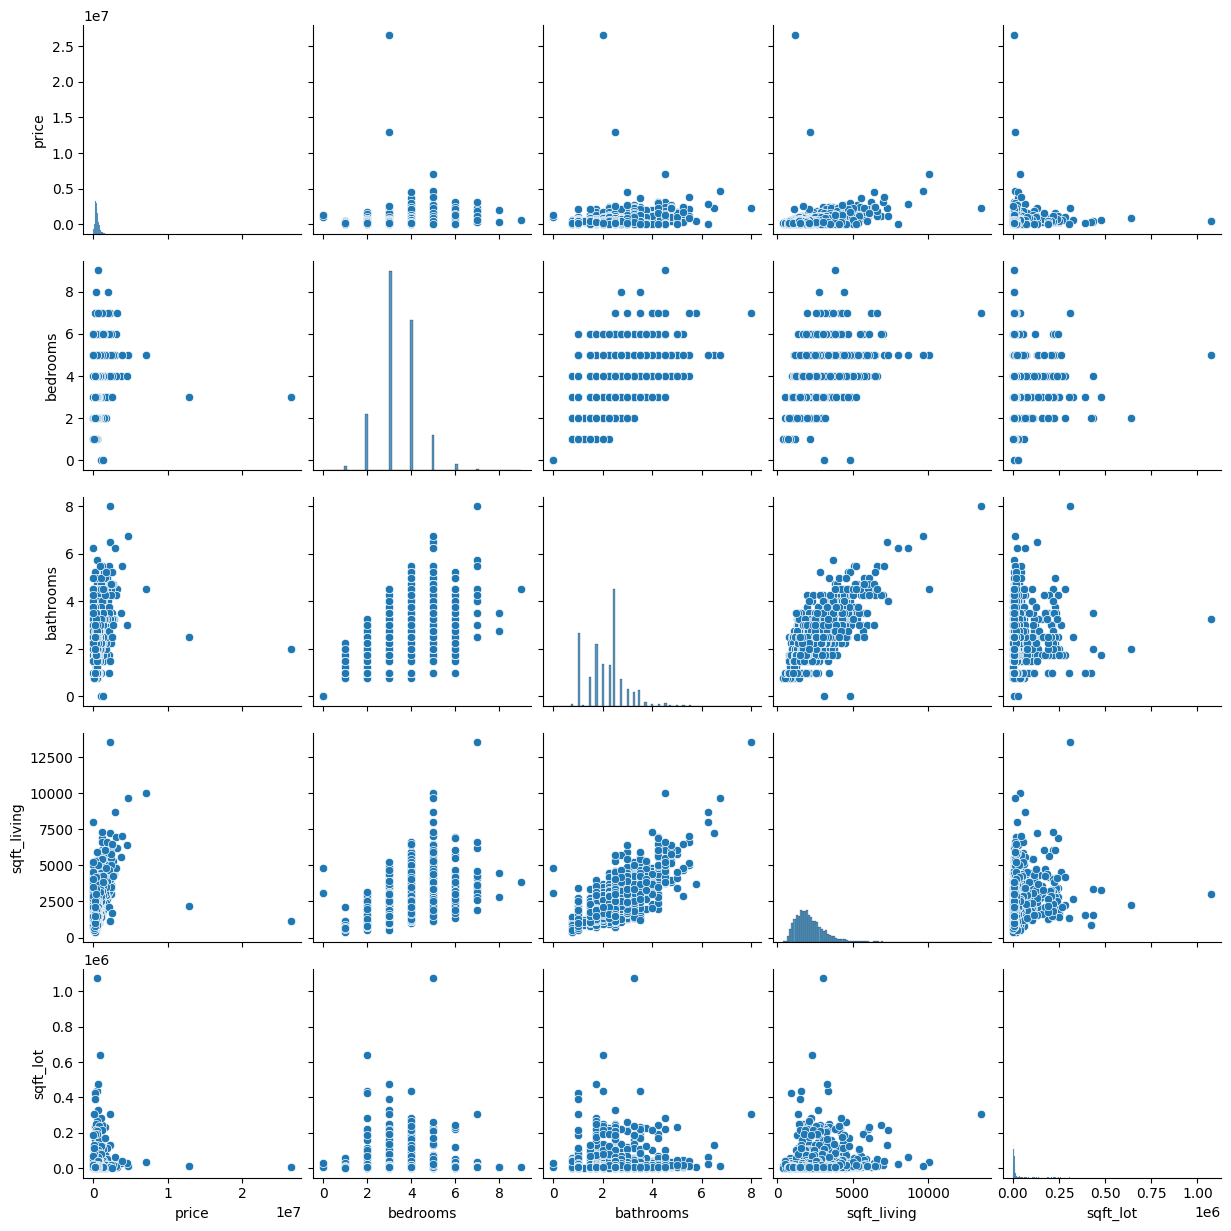

In [39]:
# Creating the pairplot
sns.pairplot(housingDF[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot']])

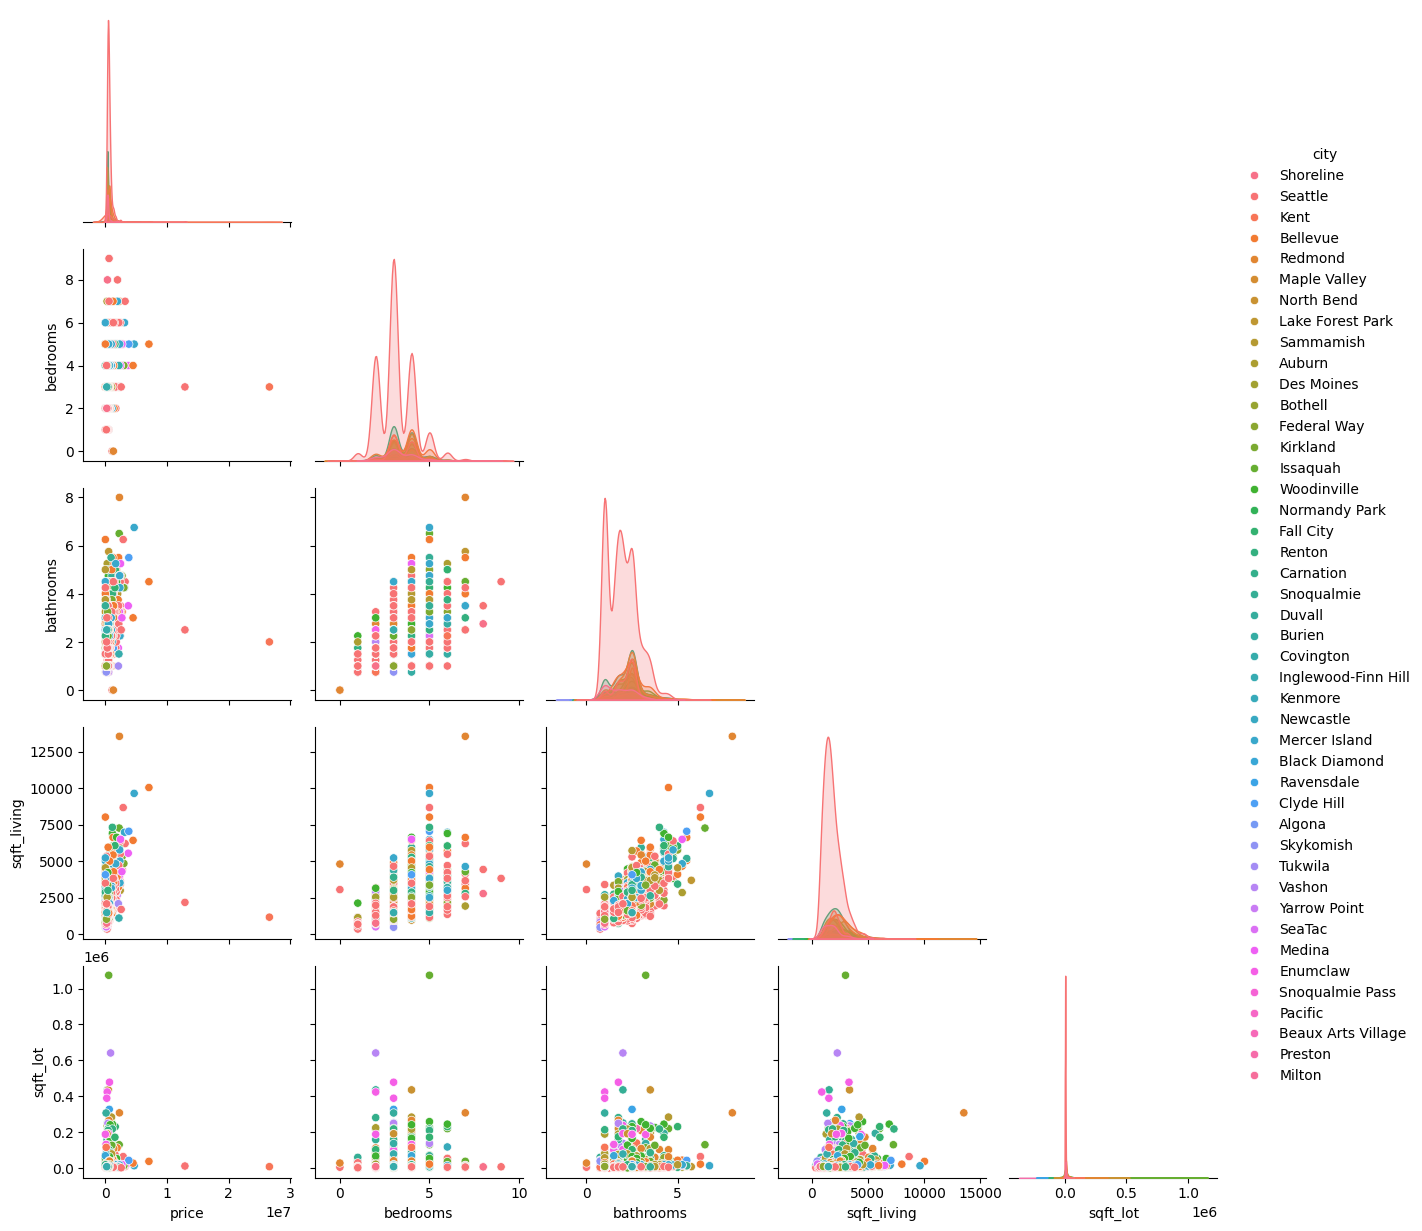

In [40]:
# Let's examine the categorical values with the previous pairplot
# Creating the pairplot
sns.pairplot(housingDF[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot','city']], hue='city', corner=True)

(0.0, 15000000.0)

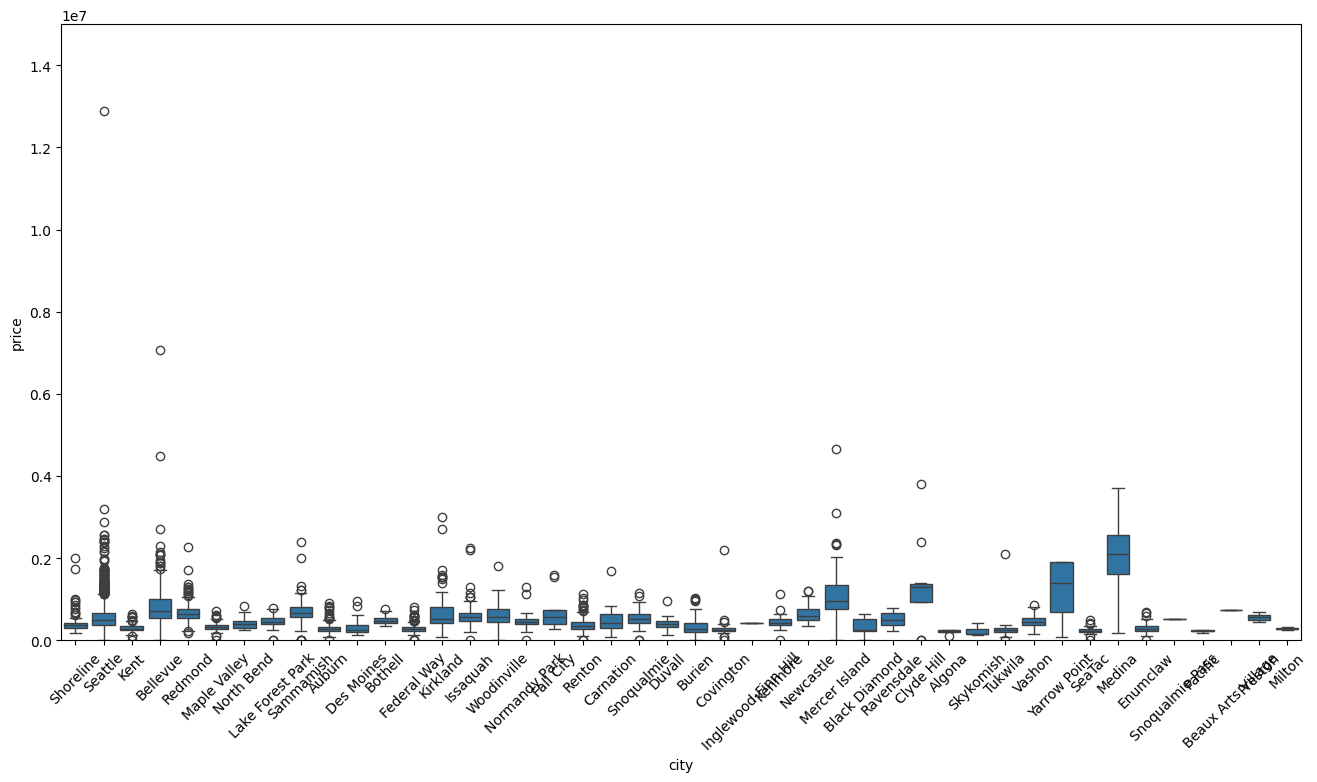

In [50]:
# Let's look at the price distribution across city
# This needs a box plot to view the data set figure, xticks
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)

# Build the plot
sns.boxplot(data= housingDF, x=housingDF["city"], y="price")
plt.ylim(0, 15000000)

(0.0, 4000000.0)

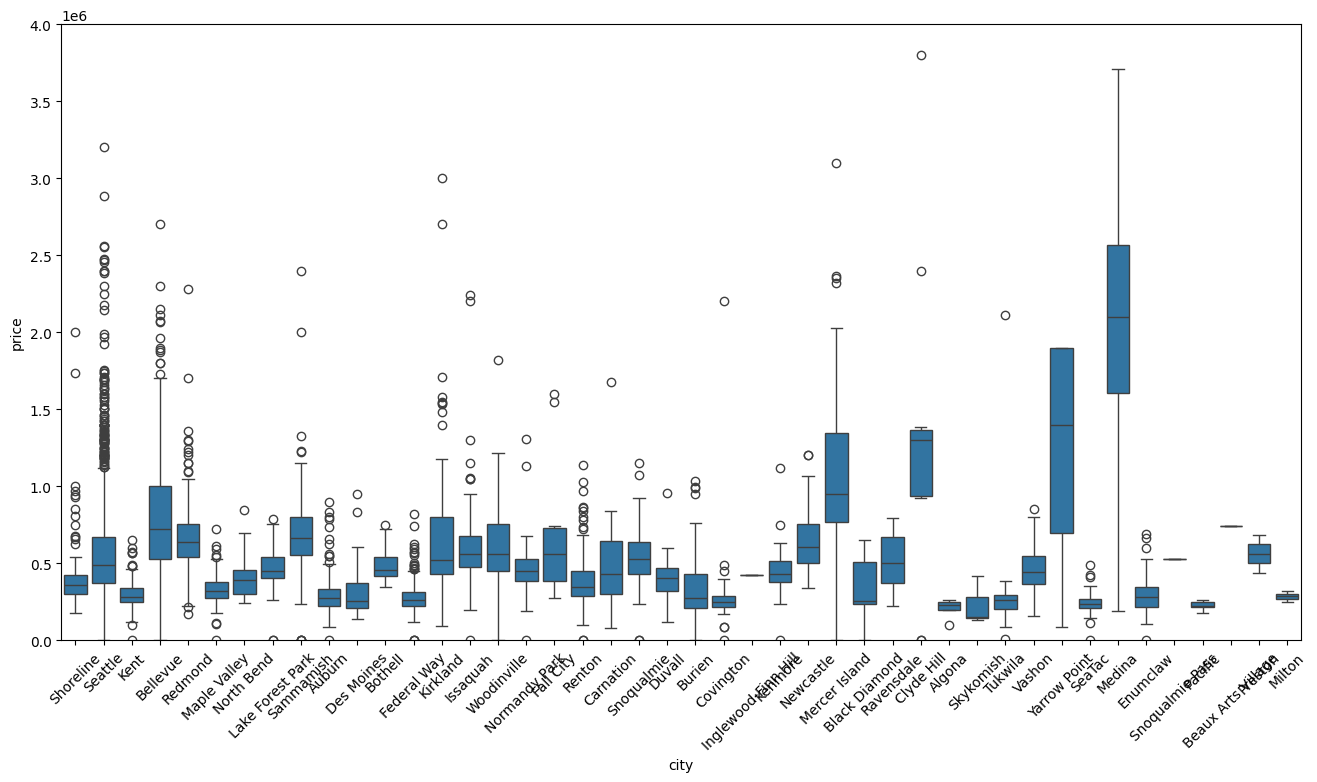

In [47]:
# Let's reset the y-axis to view the box plots for the other cities.
# The outliers greater than $4mil squeezing the other boxplots
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)

# Build the plot
sns.boxplot(data= housingDF, x=housingDF["city"], y="price")
plt.ylim(0, 4000000)